In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.manifold import MDS
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [72]:
plt.rcParams['figure.figsize'] = (20, 16)

In [73]:
train_x = pd.read_csv(r"C:\Users\ethor\Desktop\hackathon\OWL_Factory_Hackathon\data\train_x.csv", index_col=0)

In [74]:
train_y = pd.read_csv(r"C:\Users\ethor\Desktop\hackathon\OWL_Factory_Hackathon\data\train_y.csv")

In [75]:
train_x

,ProzessData_ActData_AB1_Analogs_DX1_MassPressure,ProzessData_ActData_AB1_Analogs_GY1_MassLevelTank,ProzessData_ActData_AB1_Current_DV1_Scraper,ProzessData_ActData_AB1_Current_DW1_RiserPumpFwd,ProzessData_ActData_AB1_Speed_DV1_Scraper,ProzessData_ActData_AB1_Speed_DW1_RiserPumpFwd,ProzessData_ActData_AB1_Temperature_DP1_MassHeatingStage,ProzessData_ActData_AB1_Temperature_DP1_WaterHeatingStage,ProzessData_ActData_AB1_Temperature_DQ1_MassCoolingStage,ProzessData_ActData_AB1_Temperature_DQ1_WaterCoolingStage,ProzessData_ActData_AB1_Temperature_DR1_WaterMixingStage,ProzessData_ActData_AB1_Temperature_DS1_WaterPipe,ProzessData_ActData_AB1_Temperature_DU1_WaterTank,ProzessData_ActData_AB1_Temperature_DX1_MassInfeed,hour,minute
2023-03-16 01:00:00+00:00,0.74,64.070000,0.0,0.0,0.0,0.0,41.299999,42.000000,41.599998,42.0,42.0,41.849998,42.000000,41.900002,1,0
2023-03-16 01:00:01+00:00,0.75,64.070000,0.0,0.0,0.0,0.0,41.299999,42.099998,41.599998,42.0,42.0,41.849998,41.900002,41.900002,1,0
2023-03-16 01:00:02+00:00,0.74,64.070000,0.0,0.0,0.0,0.0,41.299999,42.099998,41.599998,42.0,42.0,41.849998,41.900002,41.900002,1,0
2023-03-16 01:00:03+00:00,0.75,64.070000,0.0,0.0,0.0,0.0,41.299999,42.099998,41.599998,42.0,42.0,41.849998,41.900002,41.900002,1,0
2023-03-16 01:00:04+00:00,0.75,64.070000,0.0,0.0,0.0,0.0,41.299999,42.099998,41.599998,42.0,42.0,41.849998,41.900002,41.900002,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-11 19:59:56+00:00,0.82,63.230000,0.0,0.0,0.0,0.0,41.299999,42.000000,41.700001,42.0,42.0,41.849998,41.900002,41.900002,19,59
2023-04-11 19:59:57+00:00,0.83,63.230000,0.0,0.0,0.0,0.0,41.299999,42.000000,41.700001,42.0,42.0,41.849998,41.900002,41.900002,19,59
2023-04-11 19:59:58+00:00,0.83,63.240002,0.0,0.0,0.0,0.0,41.299999,42.000000,41.700001,42.0,42.0,41.849998,41.900002,41.900002,19,59
2023-04-11 19:59:59+00:00,0.82,63.230000,0.0,0.0,0.0,0.0,41.299999,42.000000,41.700001,42.0,42.0,41.849998,41.900002,41.900002,19,59


In [76]:
scaler = StandardScaler()
standardized_train = scaler.fit_transform(train_x)

In [77]:
scaled_df = pd.DataFrame(standardized_train, columns=train_x.columns)

In [78]:
scaled_df = scaled_df.drop(columns=["hour", "minute"])

In [79]:
pca = PCA(n_components=len(scaled_df.columns))  # You can specify the number of components you want
pca_result = pca.fit_transform(scaled_df)


In [82]:
pve = pca.explained_variance_
pve = pve / np.sum(pve)

([<matplotlib.axis.XTick at 0x21998b790d0>,
 [Text(0, 0, 'ProzessData_ActData_AB1_Analogs_DX1_MassPressure'),
  Text(1, 0, 'ProzessData_ActData_AB1_Analogs_GY1_MassLevelTank'),
  Text(2, 0, 'ProzessData_ActData_AB1_Current_DV1_Scraper'),
  Text(3, 0, 'ProzessData_ActData_AB1_Current_DW1_RiserPumpFwd'),
  Text(4, 0, 'ProzessData_ActData_AB1_Speed_DV1_Scraper'),
  Text(5, 0, 'ProzessData_ActData_AB1_Speed_DW1_RiserPumpFwd'),
  Text(6, 0, 'ProzessData_ActData_AB1_Temperature_DP1_MassHeatingStage'),
  Text(7, 0, 'ProzessData_ActData_AB1_Temperature_DP1_WaterHeatingStage'),
  Text(8, 0, 'ProzessData_ActData_AB1_Temperature_DQ1_MassCoolingStage'),
  Text(9, 0, 'ProzessData_ActData_AB1_Temperature_DQ1_WaterCoolingStage'),
  Text(10, 0, 'ProzessData_ActData_AB1_Temperature_DR1_WaterMixingStage'),
  Text(11, 0, 'ProzessData_ActData_AB1_Temperature_DS1_WaterPipe'),
  Text(12, 0, 'ProzessData_ActData_AB1_Temperature_DU1_WaterTank'),
  Text(13, 0, 'ProzessData_ActData_AB1_Temperature_DX1_MassInfee

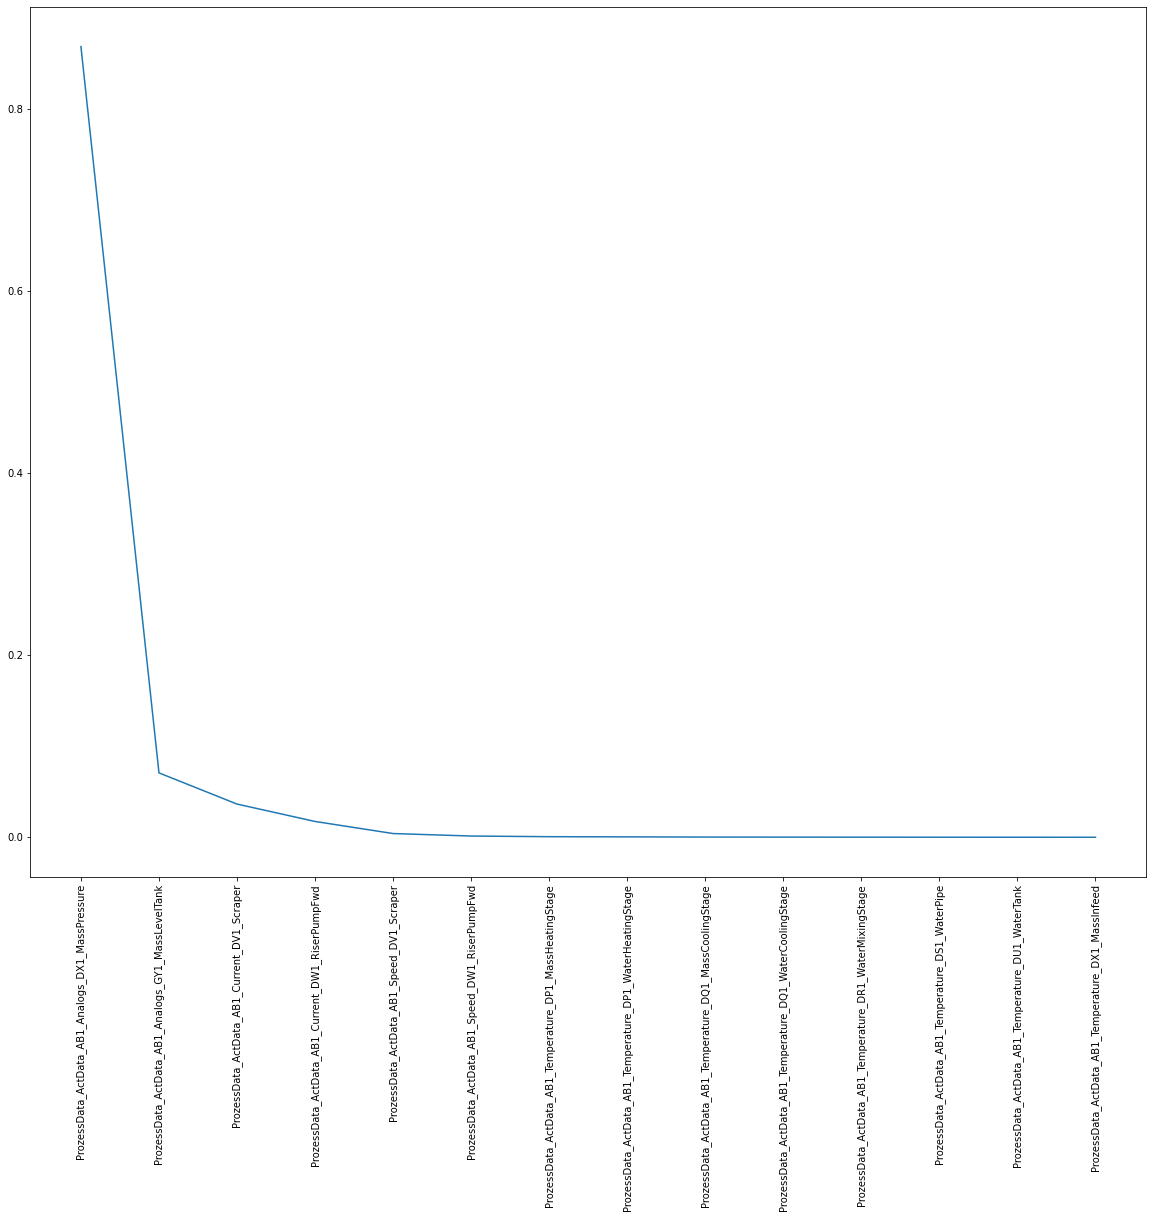

In [83]:
plt.plot(pve)
plt.xticks(ticks=list(range(len(scaled_df.columns))), labels=scaled_df.columns, rotation=90)

([<matplotlib.axis.XTick at 0x2197e2f0040>,
 [Text(0, 0, 'ProzessData_ActData_AB1_Analogs_DX1_MassPressure'),
  Text(1, 0, 'ProzessData_ActData_AB1_Analogs_GY1_MassLevelTank'),
  Text(2, 0, 'ProzessData_ActData_AB1_Current_DV1_Scraper'),
  Text(3, 0, 'ProzessData_ActData_AB1_Current_DW1_RiserPumpFwd'),
  Text(4, 0, 'ProzessData_ActData_AB1_Speed_DV1_Scraper'),
  Text(5, 0, 'ProzessData_ActData_AB1_Speed_DW1_RiserPumpFwd'),
  Text(6, 0, 'ProzessData_ActData_AB1_Temperature_DP1_MassHeatingStage'),
  Text(7, 0, 'ProzessData_ActData_AB1_Temperature_DP1_WaterHeatingStage'),
  Text(8, 0, 'ProzessData_ActData_AB1_Temperature_DQ1_MassCoolingStage'),
  Text(9, 0, 'ProzessData_ActData_AB1_Temperature_DQ1_WaterCoolingStage'),
  Text(10, 0, 'ProzessData_ActData_AB1_Temperature_DR1_WaterMixingStage'),
  Text(11, 0, 'ProzessData_ActData_AB1_Temperature_DS1_WaterPipe'),
  Text(12, 0, 'ProzessData_ActData_AB1_Temperature_DU1_WaterTank'),
  Text(13, 0, 'ProzessData_ActData_AB1_Temperature_DX1_MassInfee

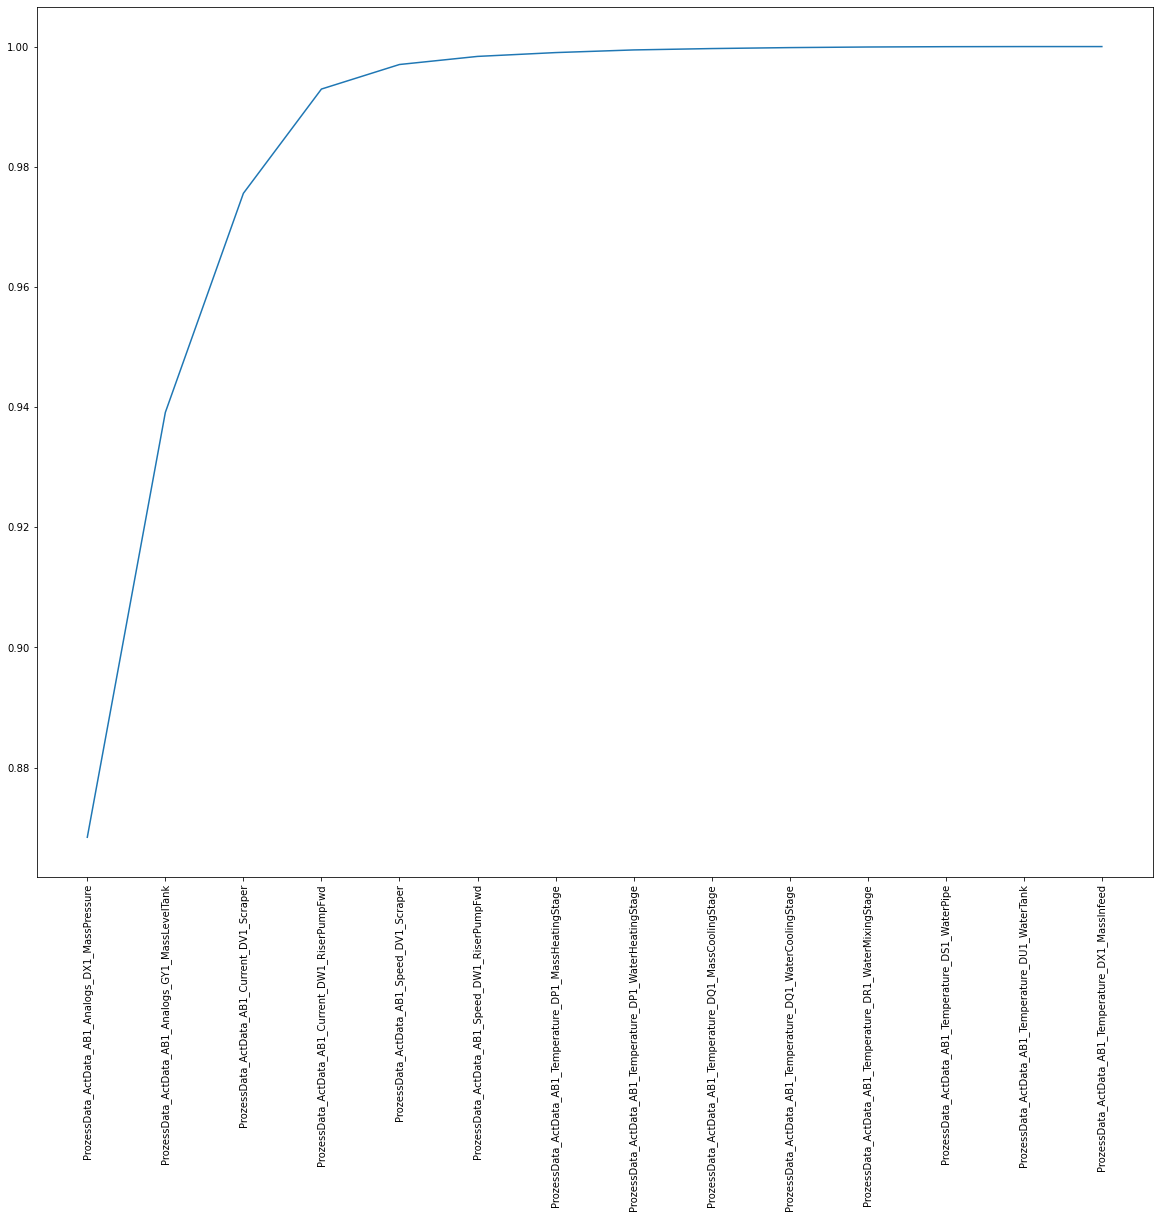

In [84]:
plt.plot(np.cumsum(pve))
plt.xticks(ticks=list(range(len(scaled_df.columns))), labels=scaled_df.columns, rotation=90)